# Primer ejercicio

## Enunciado

Un electrón con una capacidad de trabajo de $72090×10^{−19}$ J orbita de manera perpendicular a un campo magnético de __3250 G__. ¿Cuál es el radio de la órbita? ¿Y su frecuencia y periodo angular? Resuelve el mismo ejercicio para un antineutrón.

<img src="https://camo.githubusercontent.com/0995b68a3cf033bfa5f8cca804679b041f78d918/68747470733a2f2f75706c6f61642e77696b696d656469612e6f72672f77696b6970656469612f636f6d6d6f6e732f7468756d622f342f34342f416c7068617061727469636c656d61676e657469632e7376672f32323070782d416c7068617061727469636c656d61676e657469632e7376672e706e67" />

## Planteamiento

Cuando una carga atraviesa perpendicularmente un campo magnético experimenta una fuerza que le produce una desviación en la dirección, es decir, se curva la trayetoria de esa carga. 

La fuerza experimentada será perpendicular al vector dirección que lleva esa partícula.

Hay que calcular el radio de esa curvatura.



Inicializamos el entorno de Python para los cálculos

In [19]:
from sympy.physics.units import Quantity
from sympy.physics.units.systems import SI
from sympy.physics.units import magnetic_flux_density
from sympy.physics.units import tesla
from sympy.physics.units import joule
from sympy import solve, symbols, pi, Eq
from sympy.physics.units import electronvolt
from sympy.physics.units import volt
from sympy.physics.units import speed_of_light as c
from sympy.physics.units import convert_to
from sympy.physics.units import meter
from sympy.physics.units import second
from sympy.physics.units import radian


from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import ipywidgets as widgets

In [127]:

def f(x):
    return x;


Partimos de los datos del enunciado:

1. De un electrón, conocemos su masa y su carga

2. Tenemos la fuerza del campo magnético son 3250 Gauss que convertimos a Teslas, la unidad del sistema internacional

In [114]:
Gs = Quantity("Gauss",1)

SI.set_quantity_dimension(Gs, magnetic_flux_density)

SI.set_quantity_scale_factor(Gs, 1E-4*tesla)
B = 3250 * Gs
print ("Campo Magnetico: ",B)

Campo Magnetico:  3250*Gauss


3. Tenemos la energía que produce ese electrón, en Julios

In [142]:
por=interactive(f,x= widgets.FloatSlider(min=-5,max=5,value=0,description='Mod E +- 5%'))
display(por)

interactive(children=(FloatSlider(value=0.0, description='Mod E +- 5%', max=5.0, min=-5.0), Output()), _dom_cl…

In [144]:
E = (72090E-19 )* joule
E = E + (E*(por.result/100))
print ("Energía", E)
print ('porcentaje: ',por.result)

Energía 7.13691e-15*joule
porcentaje:  -1.0


## Ecuaciones a utilizar

* ### Ecuación de Lorenz

$F = q_e v_e B$

donde aplicamos que $F = \frac {m v^2}{r}$ (ley de Newton)

$q_e v_e B= \frac {m_e * v_e^2}{r}$

* ### Ecuación de Energía Cinética de un cuerpo en movimiento

$ E_c = \frac {1}{2}m v^2$

Despejando en esta ecuación

$ 2E_C = m v^2 $    y     $ v = \frac {\sqrt{2 E_c}} {\sqrt{{m}} } $

y sustituyendo en la de Lorenz tenemos que:

$ \frac {\sqrt{2 E_c} B q_e} {\sqrt{m_e}} = \frac {2 E_c}{r}$

y despejando el radio, que es lo que queremos calcular, tenemos la siguiente ecuación

$r = \frac {\sqrt{2 E_c m}} {B q} $

## Resolución

Sustituyendo los valores en la ecuación anterior:

In [134]:
r = symbols("r_giro")
v = symbols("v_giro")

q = 1*electronvolt/volt

m = 0.5 * 1E6 * electronvolt / c**2
eq_lorentz = Eq(q*v*B, (m*v**2)/r)
eq_ecinetica = Eq(E, 0.5*m*v**2)
solucion_v_r = solve([eq_ecinetica, eq_lorentz], [v, r])[1]
radio = solucion_v_r[1]


radio = convert_to(radio, [meter]).n(2)
print("Radio: ",radio)


Radio:  0.0021*meter


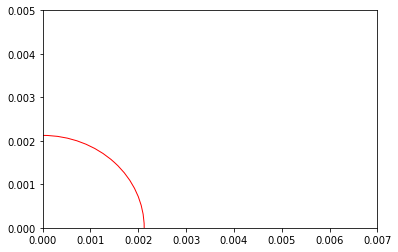

In [146]:
import matplotlib.pyplot as plt 
from sympy.core.sympify import converter
circle1 = plt.Circle((0, 0), float(radio.args[0]), color='r',fill=False) 


fig, ax = plt.subplots() 
ax.set(xlim=(-0.000,0.007 ),ylim=(-0.000,0.005))

ax.add_artist(circle1) 



## Calculando frecuencia y periodo angular

Si, además, queremos calcular la frecuencia y el periodo angular debemos saber que:
* Frecuencia (f) => Número de vueltas por segundo. Medido en Hertzios (Hz)
* Periodo    (T) => Tiempo que se tarda en dar una vuelta completa

Dado que el periodo es la inversa de la frecuencia $T = \frac {1} {f} $

Y sabemos que el periodo angular es $T = \frac {2 \pi r } {v} = \frac {2 \pi m} {q B} $


Por tanto, podemos calcular frecuencia y periodo angular:

In [123]:
T = (2 * pi * m /(B*q))
T = convert_to(T, [second]).n(2)
f = 1 / T
print ("Periodo (T): ", T)
print ("Frecuencia (f): ", f)

Periodo (T):  1.1e-10*second
Frecuencia (f):  9.3e+9/second


Si verificamos los cálculos utilizando la velocidad angular $\omega$:

Sabiendo que la velocidad velocidad angular es:

$ \omega = \frac {q B} {m}$

La Frecuencia angular $f$:

$f = \frac {\omega} {2 \pi} $

Y el Periodo angular $T$:

$T = \frac {2 \pi} {\omega} $


In [126]:
v_a = (B*q) / m
v_a = convert_to(v_a, [radian/second]).n(2)
T_a = (2 * pi) / v_a
T_a = convert_to(T_a, [second]).n(2)
f_a = v_a / (2 * pi)

print ("Velocidad angular: ", v_a)
print ("Periodo: ", T_a)
print ("Frecuencia: ", f_a)

Velocidad angular:  5.8e+10*radian/second
Periodo:  1.1e-10*second
Frecuencia:  2.9e+10*radian/(pi*second)


## Cálculos para un antineutrón

Un antineutrón es la antipartícula de un neutrón. Tiene la misma masa que éste y no tiene carga eléctrica, por tanto, no se verá afectado por un campo magnético.

# Preguntas
## ¿Por qué indicamos que las dimensiones de la unidad gauss (definida por nosotros) son de densidad de flujo magnético (magnetic_flux_density)?
El flujo magnético es una medida del campo magnético total que pasa a través de un área dada. Es una herramienta útil para describir los efectos de la fuerza magnética en algún objeto que ocupa un área dada. La medición del campo magnético está atada al área particular de elección. Podemos escoger como queramos el tamaño del área y su orientación relativa al campo magnético.Como estamos haciendo los calculos sobre una particula no podemos depender del area que esta ocupa, por lo que es necesario establecer esta unidad.volt

## ¿Por qué la carga del electrón se ha definido como electronvolt/volt?



